# Practice Exercise on Artificial Neural Networks (ANN)

Welcome to the Practice Exercise on Artificial Neural Networks (ANN). In this exercise, we will focus on a classification task where the goal is to predict customer churn. We will work with a dataset to build, train, and evaluate ANN model. This practice will allow you to apply your understanding of neural networks to achieve the best performance.

---

## Dataset Overview

### **Dataset Name:** Telco Customer Churn

### **Description:**  
The dataset contains customer data from a telecommunications company and is used to predict customer churn. Churn refers to customers who stopped using the company's service within the last month. Each row represents a customer, and the dataset includes information about customer demographics, account information, and the services they have signed up for.

### **Features:**
The dataset contains the following columns:

- `customerID`: Unique identifier for the customer.
- `gender`: Gender of the customer (Male, Female).
- `SeniorCitizen`: Whether the customer is a senior citizen (1: Yes, 0: No).
- `Partner`: Whether the customer has a partner (Yes, No).
- `Dependents`: Whether the customer has dependents (Yes, No).
- `tenure`: Number of months the customer has stayed with the company.
- `PhoneService`: Whether the customer has phone service (Yes, No).
- `MultipleLines`: Whether the customer has multiple lines (Yes, No, No phone service).
- `InternetService`: Customer’s internet service provider (DSL, Fiber optic, No).
- `OnlineSecurity`: Whether the customer has online security (Yes, No, No internet service).
- `OnlineBackup`: Whether the customer has online backup (Yes, No, No internet service).
- `DeviceProtection`: Whether the customer has device protection (Yes, No, No internet service).
- `TechSupport`: Whether the customer has tech support (Yes, No, No internet service).
- `StreamingTV`: Whether the customer has streaming TV service (Yes, No, No internet service).
- `StreamingMovies`: Whether the customer has streaming movies service (Yes, No, No internet service).
- `Contract`: The contract term of the customer (Month-to-month, One year, Two year).
- `PaperlessBilling`: Whether the customer has paperless billing (Yes, No).
- `PaymentMethod`: The payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- `MonthlyCharges`: The amount charged to the customer monthly.
- `TotalCharges`: The total amount charged to the customer.
- `Churn`: Whether the customer churned (Yes, No).

### **Target Variable:**
- `Churn`: The variable that indicates whether a customer has churned or not.

## Importing Libraries

In [80]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Exploratory Data Analysis (EDA)

* **Inspect the dataset**: The first step is to load the dataset and examine its structure. You will look at the first few rows to ensure it has been correctly loaded and check for basic formatting issues.

* **Dataset structure**: Understand the structure of the dataset, including the number of rows, columns, and data types of each feature. This helps to identify categorical and numerical features and assess the need for data cleaning.

* **Summary statistics**: Generate summary statistics to better understand the distribution of numerical features. This includes measures like mean, median, standard deviation, minimum, and maximum values.

* **Check for missing values**: Identify any missing values in the dataset, as they can influence model performance.

* **Distribution of features**: Plot the distributions of numerical features to identify skewness, outliers, or unusual patterns.

* **Categorical feature analysis**: For categorical variables, count the frequency of each category.

* **Correlation matrix**: Generate a correlation matrix to understand relationships between numerical features.

* **Outlier detection**: Detect and visualize outliers, which can distort the training process. Outliers can be identified using box plots.

And add more as needed!


In [81]:
df=pd.read_csv('/content/Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [82]:
df.shape

(7043, 21)

In [84]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [85]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


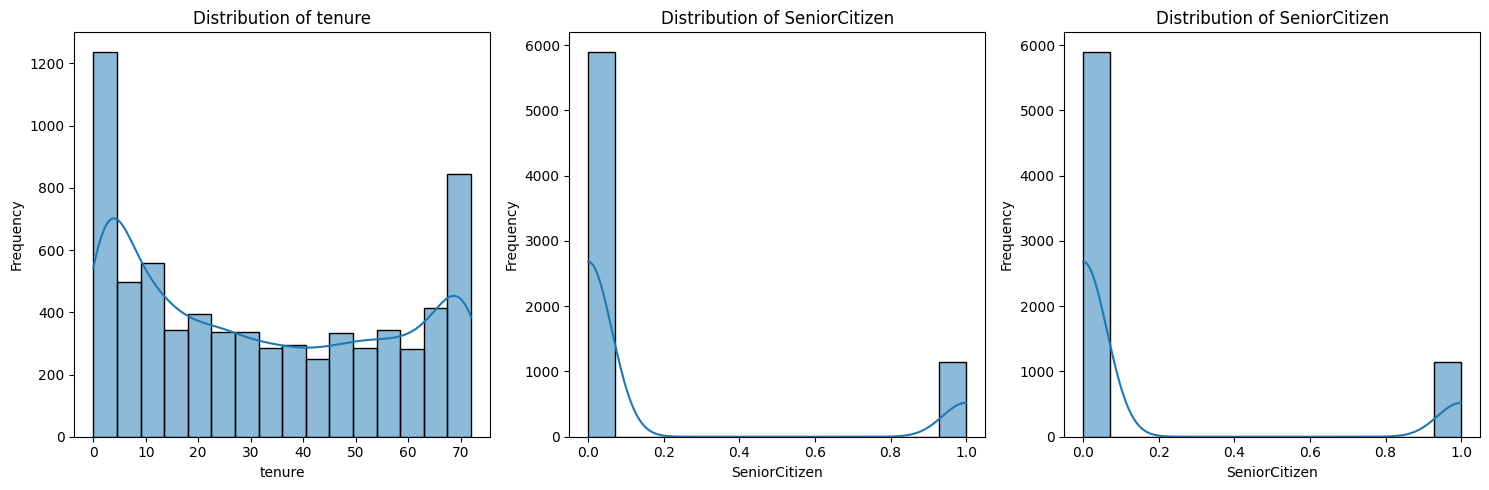

In [53]:

# List of numerical features
numerical_features = ['tenure', 'SeniorCitizen', 'SeniorCitizen']

# Plot histograms
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

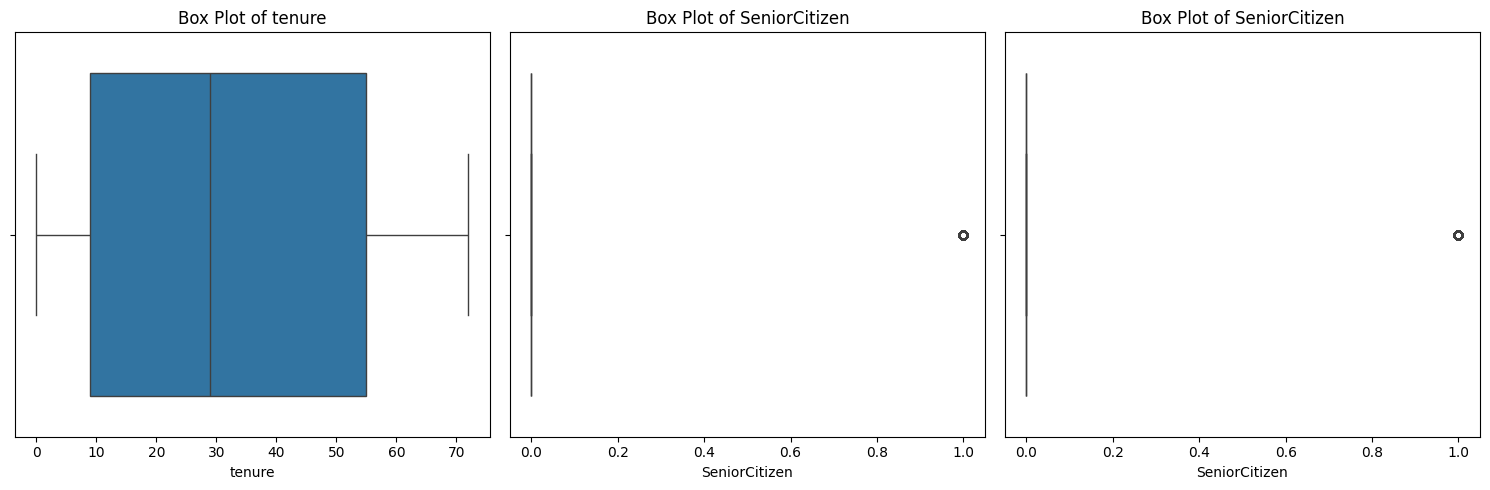

In [9]:
# Plot box plots to detect outliers
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(x=df[feature].dropna())
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()



In [54]:
# List of categorical features
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService',
                         'MultipleLines', 'InternetService', 'OnlineSecurity',
                         'OnlineBackup', 'DeviceProtection', 'TechSupport',
                         'StreamingTV', 'StreamingMovies', 'Contract',
                         'PaperlessBilling', 'PaymentMethod', 'Churn']

# Count frequency of each category for categorical features
for feature in categorical_features:
    print(f'Frequency distribution for :')
    print(df[feature].value_counts())
    print('\n')


Frequency distribution for :
gender
Male      3555
Female    3488
Name: count, dtype: int64


Frequency distribution for :
Partner
No     3641
Yes    3402
Name: count, dtype: int64


Frequency distribution for :
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


Frequency distribution for :
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


Frequency distribution for :
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


Frequency distribution for :
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


Frequency distribution for :
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


Frequency distribution for :
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


Frequency distribution for :
DeviceProtect

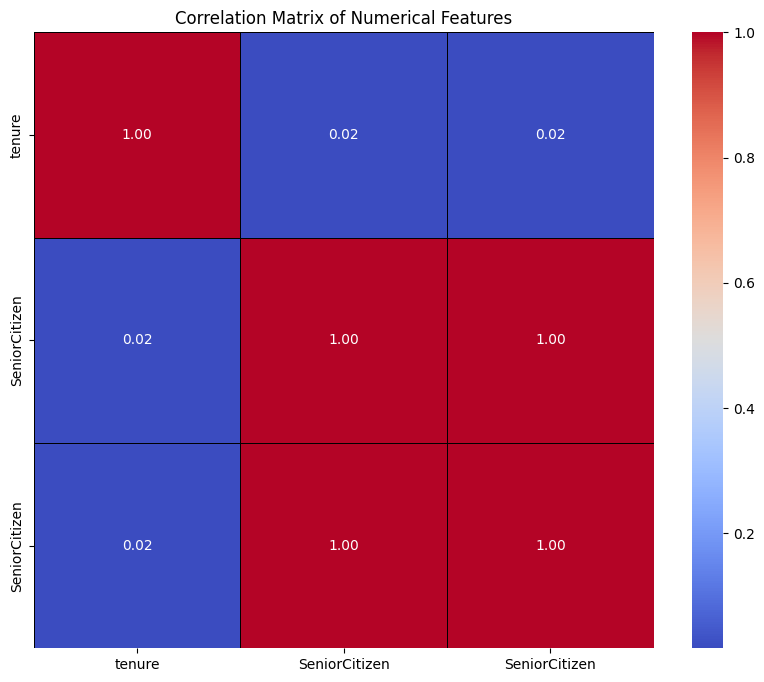

In [55]:
# Calculate the correlation matrix
correlation_matrix = df[['tenure', 'SeniorCitizen', 'SeniorCitizen']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## Data Preprocessing

* **Handling missing values**: If there are any missing values identified during EDA, you must decide how to handle them. Common strategies include removing rows or columns with missing values, or imputing them using methods like the mean, median, or a constant value.

* **Encoding categorical variables**: For machine learning models, categorical variables often need to be converted into numerical representations. Common techniques include:
   - **One-hot encoding**: Converts categorical variables into a series of binary columns.
   - **Label encoding**: Assigns a unique integer to each category.
   
* **Scaling and normalization**: Features often need to be scaled so that all of them contribute equally to the model. Two common techniques include:
   - **Standardization (Z-score scaling)**: Centers the data around a mean of 0 and standard deviation of 1. This is suitable for algorithms that assume normally distributed data, such as neural networks.
   - **Min-Max scaling (Normalization)**: Scales the data to a range (usually between 0 and 1). This technique is useful when the algorithm requires a bounded input range, such as in some neural networks.

* **Feature engineering**: In this step, new features can be created from the existing data to enhance the model’s predictive power. This may include combining features, applying mathematical transformations, or encoding domain-specific information.

* **Handling imbalanced data** (if applicable): If the dataset has imbalanced classes, it may be necessary to apply techniques such as:
   - **Oversampling** the minority class.
   - **Undersampling** the majority class.

And add more as needed!


In [86]:
df = df.drop('customerID',axis=1)

In [87]:
#count of string value into the column.
count=0
for i in df.TotalCharges:
    if i==' ':
        count+=1
print('count of empty string:- ',count)
#we will replace this empty string to nan values
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
# typecasting of the TotalCharges column
df['TotalCharges'] = df['TotalCharges'].astype(float)

count of empty string:-  11


In [88]:
# checking null value
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [89]:
# fill null values with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [90]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Assuming df is your DataFrame and it contains categorical columns
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService',
                         'MultipleLines', 'InternetService', 'OnlineSecurity',
                         'OnlineBackup', 'DeviceProtection', 'TechSupport',
                         'StreamingTV', 'StreamingMovies', 'Contract',
                         'PaperlessBilling', 'PaymentMethod', 'Churn']

# Apply label encoding to each categorical column
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Display the first few rows of the updated DataFrame
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [62]:
#  initilaize scaller
from sklearn.preprocessing import StandardScaler
scaller =StandardScaler()

# Select only numerical columns for scaling
numerical_features = df.select_dtypes(include=['number']).columns
df[numerical_features] = scaller.fit_transform(df[numerical_features])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.992611,-0.601023
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.172165,-0.601023
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.958066,1.663829
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.193672,-0.601023
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.938874,1.663829


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [91]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



In [94]:
# Define the model
model = Sequential()

# Add an input layer and a hidden layer
#X_train.shape[1]: This retrieves the number of features (columns) in your training data. For example, if X_train has 20 features, then X_train.shape[1]
model.add(Dense(units=64, activation='relu', input_shape=(x_train.shape[1],)))
# Hidden layers
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))
# Output layer
model.add(Dense(units=1, activation='sigmoid'))

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metric.

In [98]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,719 (6.71 KB)

 Trainable params: 1,719 (6.71 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [100]:


model.fit(x_train, y_train, batch_size=10, epochs=20, validation_split=0.2)

Epoch 1/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6895 - loss: 5.0893 - val_accuracy: 0.7835 - val_loss: 0.5805
Epoch 2/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7667 - loss: 0.5727 - val_accuracy: 0.7879 - val_loss: 0.5284
Epoch 3/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7698 - loss: 0.5338 - val_accuracy: 0.7826 - val_loss: 0.5175
Epoch 4/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7659 - loss: 0.5316 - val_accuracy: 0.7799 - val_loss: 0.5068
Epoch 5/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7829 - loss: 0.5061 - val_accuracy: 0.7826 - val_loss: 0.5090
Epoch 6/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7693 - loss: 0.5179 - val_accuracy: 0.7888 - val_loss: 0.4965
Epoch 7/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7769 - loss: 0.5055 - val_accuracy: 0.7897 - val_loss: 0.4948
Epoch 8/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7858 - loss: 0.5040 - val_accuracy: 0.

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [101]:

# Now evaluate the model
model.evaluate(x_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7983 - loss: 0.4965


[0.4927143454551697, 0.7948899865150452]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [102]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

print(y_pred)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[ True]
 [False]
 [False]
 ...
 [False]
 [False]
 [ True]]


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

In [103]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test,y_pred)

In [104]:
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[958  78]
 [211 162]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.68      0.43      0.53       373

    accuracy                           0.79      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.68      0.43      0.53       373

    accuracy                           0.79      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



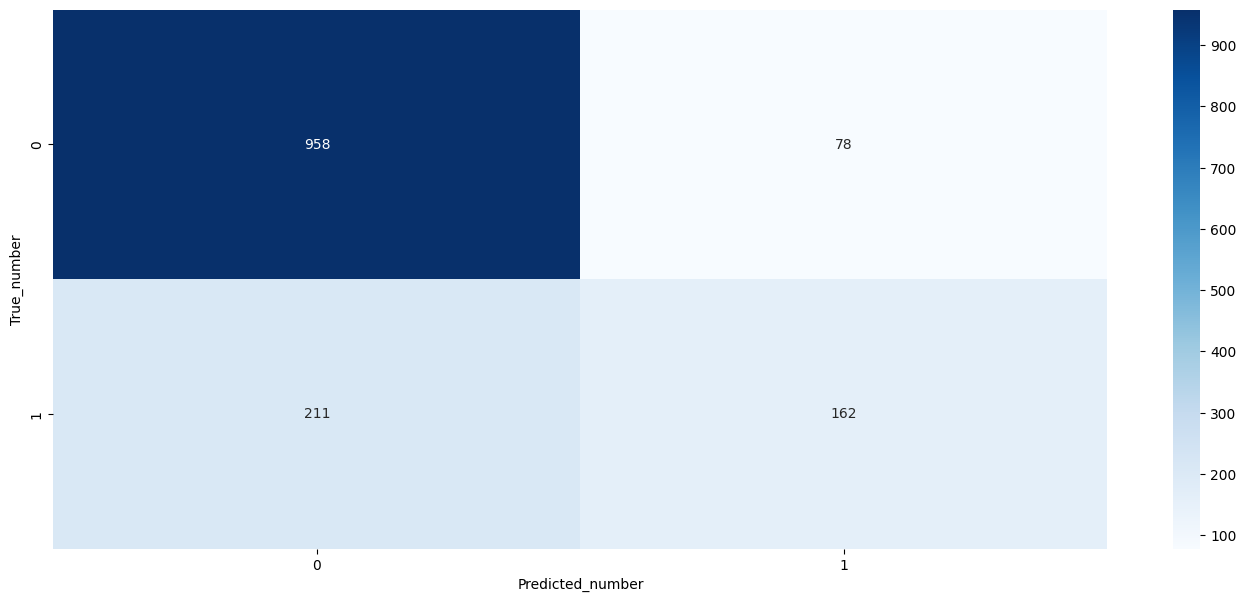

In [109]:



#print classification_report
print(classification_report(y_test,y_pred))

# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_pred).numpy() # Convert to NumPy array
plt.figure(figsize = (17,7))
sns.heatmap(conf_mat, annot=True,fmt='d',cmap='Blues') # Use Seaborn's heatmap
plt.xlabel('Predicted_number')
plt.ylabel('True_number')
plt.show()

In [105]:
_, accuracy = model.evaluate(x_test, y_test)
print(f"\nStep 8: Report the ANN Model Accuracy\nANN Model Accuracy: {accuracy * 100:.2f}%")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7983 - loss: 0.4965

Step 8: Report the ANN Model Accuracy
ANN Model Accuracy: 79.49%


## Save the Model
Save the trained model for submission.

In [110]:
# Save the model to a file in Colab's local filesystem
model.save('/content/model.h5')


In [111]:
# Define the model
model = Sequential()
# define input layer
model.add(Dense(units=64, activation='relu', input_shape=(x_train.shape[1],)))

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [113]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,921 (70.00 KB)

 Trainable params: 17,921 (70.00 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
model.fit(x_train, y_train, batch_size=10, epochs=20, validation_split=0.2)

Epoch 1/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6585 - loss: 8.9778 - val_accuracy: 0.7711 - val_loss: 1.6945
Epoch 2/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7203 - loss: 2.8953 - val_accuracy: 0.7817 - val_loss: 3.7839
Epoch 3/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7218 - loss: 1.2679 - val_accuracy: 0.7915 - val_loss: 0.6496
Epoch 4/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7442 - loss: 1.0001 - val_accuracy: 0.7897 - val_loss: 0.7894
Epoch 5/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7458 - loss: 1.1157 - val_accuracy: 0.7906 - val_loss: 0.6990
Epoch 6/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7404 - loss: 0.7428 - val_accuracy: 0.7906 - val_loss: 0.4950
Epoch 7/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7700 - loss: 0.5619 - val_accuracy: 0.7028 - val_loss: 0.5488
Epoch 8/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7782 - loss: 0.5227 - val_accuracy: 0.

In [115]:

# Now evaluate the model
model.evaluate(x_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8020 - loss: 0.4472


[0.44589799642562866, 0.8019872307777405]

In [116]:

# Define the model
model = Sequential()
# define input layer
model.add(Dense(units=64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.5))  # normalization
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))  # normalization
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))  # normalization
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [118]:
#train or fit the model
model.fit(x_train, y_train, batch_size=10, epochs=20, validation_split=0.2)

Epoch 1/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6429 - loss: 75.4732 - val_accuracy: 0.7303 - val_loss: 1.3914
Epoch 2/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6372 - loss: 10.8536 - val_accuracy: 0.4632 - val_loss: 0.6971
Epoch 3/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6026 - loss: 3.0921 - val_accuracy: 0.5555 - val_loss: 0.6749
Epoch 4/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6248 - loss: 1.4009 - val_accuracy: 0.7507 - val_loss: 0.6536
Epoch 5/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7007 - loss: 1.1004 - val_accuracy: 0.7507 - val_loss: 0.6141
Epoch 6/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7281 - loss: 0.7663 - val_accuracy: 0.7507 - val_loss: 0.6047
Epoch 7/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7112 - loss: 0.7952 - val_accuracy: 0.7507 - val_loss: 0.5883
Epoch 8/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7349 - loss: 0.6582 - val_accuracy: 

In [119]:
_, accuracy = model.evaluate(x_test, y_test)
print(f"\nStep 8: Report the ANN Model Accuracy\nANN Model Accuracy: {accuracy * 100:.2f}%")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7253 - loss: 0.5756

Step 8: Report the ANN Model Accuracy
ANN Model Accuracy: 73.53%
